In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Converting Training VIA (VGG Image Annotator) Annotations
to DeepForest Format

In [ ]:
import pandas as pd
import json

# Load the original CSV file
csv_path = '/content/drive/MyDrive/InternshipProject/annotation.csv'
via_annotations = pd.read_csv(csv_path)

# Print the DataFrame to inspect its structure
print("Loaded DataFrame:")
print(via_annotations.head())

# Print the column names to verify
print("\nColumn Names:")
print(via_annotations.columns)

# Create a list to accumulate the rows
annotations_list = []

for index, row in via_annotations.iterrows():
    filename = row['filename']
    region_shape_str = row['region_shape_attributes']
    region_attr_str = row['region_attributes']


    try:
        region_shape = json.loads(region_shape_str.replace("'", "\""))
        region_attr = json.loads(region_attr_str.replace("'", "\""))
    except json.JSONDecodeError as e:
        print(f"  JSON decode error: {e}")
        continue

    # Check if the Tree_Type is 'Liege'
    if '1' in region_attr.get('Tree_Type', {}):
        if region_shape['name'] == 'rect':
            xmin = region_shape['x']
            ymin = region_shape['y']
            xmax = xmin + region_shape['width']
            ymax = ymin + region_shape['height']

            annotations_list.append({
                'image_path': filename,
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax,
                'label': 'Liege'
            })

# Convert the list to a DataFrame
df = pd.DataFrame(annotations_list)

# Save the new DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/InternshipProject/annotations.csv'
df.to_csv(output_csv_path, index=False)

print("Annotations have been successfully converted and saved to annotations.csv")


Loaded DataFrame:
          filename  file_size file_attributes  region_count  region_id  \
0  Ain_Snoussi.PNG     510561              {}            46          0   
1  Ain_Snoussi.PNG     510561              {}            46          1   
2  Ain_Snoussi.PNG     510561              {}            46          2   
3  Ain_Snoussi.PNG     510561              {}            46          3   
4  Ain_Snoussi.PNG     510561              {}            46          4   

                             region_shape_attributes         region_attributes  
0  {"name":"rect","x":105,"y":19,"width":38,"heig...  {"Tree_Type":{"1":true}}  
1  {"name":"rect","x":19,"y":122,"width":27,"heig...  {"Tree_Type":{"1":true}}  
2  {"name":"rect","x":40,"y":321,"width":39,"heig...  {"Tree_Type":{"1":true}}  
3  {"name":"rect","x":82,"y":350,"width":35,"heig...  {"Tree_Type":{"1":true}}  
4  {"name":"rect","x":138,"y":365,"width":27,"hei...  {"Tree_Type":{"1":true}}  

Column Names:
Index(['filename', 'file_size', 'fil

Converting Validation VIA (VGG Image Annotator) Annotations to DeepForest Format

In [ ]:
import pandas as pd
import json

# Load the original CSV file
csv_path = '/content/drive/MyDrive/InternshipProject/Validation.csv'
via_annotations = pd.read_csv(csv_path)

# Print the DataFrame to inspect its structure
print("Loaded DataFrame:")
print(via_annotations.head())

# Print the column names to verify
print("\nColumn Names:")
print(via_annotations.columns)

# Create a list to accumulate the rows
annotations_list = []

for index, row in via_annotations.iterrows():
    filename = row['filename']
    region_shape_str = row['region_shape_attributes']
    region_attr_str = row['region_attributes']


    try:
        region_shape = json.loads(region_shape_str.replace("'", "\""))
        region_attr = json.loads(region_attr_str.replace("'", "\""))
    except json.JSONDecodeError as e:
        print(f"  JSON decode error: {e}")
        continue

    # Check if the Tree_Type is 'Liege'
    if '1' in region_attr.get('Tree_Type', {}):
        if region_shape['name'] == 'rect':
            xmin = region_shape['x']
            ymin = region_shape['y']
            xmax = xmin + region_shape['width']
            ymax = ymin + region_shape['height']

            annotations_list.append({
                'image_path': filename,
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax,
                'label': 'Liege'
            })

# Convert the list to a DataFrame
df = pd.DataFrame(annotations_list)

# Save the new DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/InternshipProject/validations.csv'
df.to_csv(output_csv_path, index=False)

print("Annotations have been successfully converted and saved to validations.csv")


Loaded DataFrame:
                       filename  file_size file_attributes  region_count  \
0  El_Feija_National_Park_1.PNG    1002848              {}            36   
1  El_Feija_National_Park_1.PNG    1002848              {}            36   
2  El_Feija_National_Park_1.PNG    1002848              {}            36   
3  El_Feija_National_Park_1.PNG    1002848              {}            36   
4  El_Feija_National_Park_1.PNG    1002848              {}            36   

   region_id                            region_shape_attributes  \
0          0  {"name":"rect","x":37,"y":11,"width":42,"heigh...   
1          1  {"name":"rect","x":21,"y":159,"width":42,"heig...   
2          2  {"name":"rect","x":195,"y":119,"width":51,"hei...   
3          3  {"name":"rect","x":100,"y":59,"width":46,"heig...   
4          4  {"name":"rect","x":95,"y":109,"width":45,"heig...   

          region_attributes  
0  {"Tree_Type":{"1":true}}  
1  {"Tree_Type":{"1":true}}  
2  {"Tree_Type":{"1":true}}  
3 

Training the DeepForest Model with Custom Annotations

In [ ]:
from deepforest import main
import pandas as pd
import os
import torch

# Load your annotations CSV
annotations_path = '/content/drive/MyDrive/InternshipProject/annotations.csv'
annotations = pd.read_csv(annotations_path)

# Load your validation CSV
validation_path = '/content/drive/MyDrive/InternshipProject/validations.csv'
validations = pd.read_csv(validation_path)

# Check the unique labels in the annotations file
unique_labels = annotations['label'].unique()
print(f"Unique labels in the annotations file: {unique_labels}")

# Create the label dictionary
label_dict = {label: idx for idx, label in enumerate(unique_labels)}
print(f"Label dictionary: {label_dict}")

# Initialize the DeepForest model
model = main.deepforest()
model.use_release()

# Set the root directory path explicitly
root_dir = "/content/drive/MyDrive/InternshipProject/Pretraining_Images"
model.config["train"]["root_dir"] = root_dir

# Set the root directory path explicitly
root_dir = "/content/drive/MyDrive/InternshipProject/Pretraining_Images"
model.config["train"]["root_dir"] = root_dir

# Verify paths
print(f"Annotations Path: {annotations_path}")
print(f"Images Directory: {model.config['train']['root_dir']}")
print(f"Validation Path: {validation_path}")

# Load your annotations into the model
model.config["train"]["csv_file"] = annotations_path
model.config["train"]["val_csv_file"] = validation_path

# Print configuration to verify
print(f"Training CSV: {model.config['train']['csv_file']}")
print(f"Validation CSV: {model.config['train']['val_csv_file']}")

# Ensure the root directory exists
if not os.path.isdir(root_dir):
    raise FileNotFoundError(f"The specified root directory does not exist: {root_dir}")

# Update the label_dict in the model
model.label_dict = label_dict

# Ensure epochs are set properly
model.config["train"]["epochs"] = 10  # Set to your desired number of epochs

# Prepare and train the model
try:
    model.create_trainer()
    model.trainer.log_every_n_steps = 1
    model.trainer.fit(model)  # Pass the model as an argument to fit
except Exception as e:
    print(f"An error occurred: {e}")

# Save the trained model
model_path = '/content/drive/MyDrive/InternshipProject/deepforest_model.pth'
torch.save(model.model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Unique labels in the annotations file: ['Liege']
Label dictionary: {'Liege': 0}
Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
Annotations Path: /content/drive/MyDrive/InternshipProject/annotations.csv
Images Directory: /content/drive/MyDrive/InternshipProject/Pretraining_Images
Validation Path: /content/drive/MyDrive/InternshipProject/validations.csv
Training CSV: /content/drive/MyDrive/InternshipProject/annotations.csv
Validation CSV: /content/drive/MyDrive/InternshipProject/validations.csv
No validation file provided. Turning off validation loop


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                  | Params | Mode 
-------------------------------------------------------------
0 | model      | RetinaNet             | 32.1 M | train
1 | iou_metric | IntersectionOverUnion | 0      | train
2 | mAP_metric | MeanAveragePrecision  | 0      | train
-------------------------------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithread

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Model saved to /content/drive/MyDrive/InternshipProject/deepforest_model.pth


Saving Predictions Results

In [ ]:
import os
import torch
from deepforest import main
import pandas as pd

# Load the model
model_path = '/content/drive/MyDrive/InternshipProject/deepforest_model.pth'
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load(model_path))
model.model.eval()

# Directory containing test images
test_images_dir = "/content/drive/MyDrive/InternshipProject/Pretraining_Images"
# Directory to save post-training images
posttraining_dir = "/content/drive/MyDrive/InternshipProject/Posttraining_Images"
os.makedirs(posttraining_dir, exist_ok=True)  # Ensure the output directory exists

# Check the contents of the test images directory
files = os.listdir(test_images_dir)

# List all image files with .png extension, handling case insensitivity
test_images = [os.path.join(test_images_dir, img) for img in files if img.lower().endswith((".png", ".jpg", ".jpeg"))]


def plot_predictions_without_labels(image_path, predictions, output_path):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Plot each prediction
    for index, row in predictions.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        width, height = xmax - xmin, ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')

    # Save the visualized image
    try:
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)

    except Exception as e:
        print(f"Failed to save image {output_path}: {e}")

# Load ground truth annotations
ground_truth_path = '/content/drive/MyDrive/InternshipProject/annotations.csv'
ground_truth = pd.read_csv(ground_truth_path)

# Predict on each test image and visualize results
tree_counts = {}

for image_path in test_images:
    predictions = model.predict_image(path=image_path)

    if not isinstance(predictions, pd.DataFrame):
        print(f"Error: Predictions for {image_path} are not in DataFrame format.")
        continue


    if predictions.empty:
        print(f"No predictions made for {image_path}.")
        continue

    # Count the number of trees
    num_trees = len(predictions)
    tree_counts[os.path.basename(image_path)] = num_trees

    # Plot predictions without labels and save to post-training directory
    output_path = os.path.join(posttraining_dir, "predictions_" + os.path.basename(image_path))
    plot_predictions_without_labels(image_path, predictions, output_path)

print("Tree counts per image:")
for image, count in tree_counts.items():
    print(f"{image}: {count} trees")


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
Tree counts per image:
El_Feija_National_Park_1.PNG: 53 trees
El_Feija_National_Park_2.PNG: 34 trees
Ain_Snoussi.PNG: 50 trees
Jbel_Serj_National_Park.PNG: 56 trees
Testour.PNG: 21 trees
El_Feija_National_Park_3.PNG: 34 trees


Validation Image Predictions and Evaluation

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepforest import main
import torch
from PIL import Image

# Load the trained model
model_path = '/content/drive/MyDrive/InternshipProject/deepforest_model.pth'
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load(model_path))
model.model.eval()

# Directory containing validation images
validation_images_dir = "/content/drive/MyDrive/InternshipProject/Validation_Images"  # Update this path

# List all image files with .png, .jpg, or .jpeg extension
validation_image_paths = [
    os.path.join(validation_images_dir, img)
    for img in os.listdir(validation_images_dir)
    if img.lower().endswith((".png", ".jpg", ".jpeg"))
]

# Directory to save visualized images
visualization_dir = "/content/drive/MyDrive/InternshipProject/Predicted_Images"
os.makedirs(visualization_dir, exist_ok=True)

# Load validation annotations
validation_annotations = pd.read_csv("/content/drive/MyDrive/InternshipProject/validations.csv")

def plot_predictions(image_path, predictions, output_path):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Plot each prediction
    for _, row in predictions.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        width, height = xmax - xmin, ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')

    # Save the visualized image
    try:
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)
        plt.close()
    except Exception as e:
        print(f"Failed to save image {output_path}: {e}")

# Predict on validation images and visualize results
for image_path in validation_image_paths:
    predictions = model.predict_image(path=image_path)

    if not isinstance(predictions, pd.DataFrame):
        print(f"Error: Predictions for {image_path} are not in DataFrame format.")
        continue

    if predictions.empty:
        print(f"No predictions made for {image_path}.")
        continue

    # Create output path for visualization
    output_path = os.path.join(visualization_dir, "predictions_" + os.path.basename(image_path))
    plot_predictions(image_path, predictions, output_path)

# Confusion matrix functions
def calculate_iou(box1, box2):
    x1_max = max(box1['xmin'], box2['xmin'])
    y1_max = max(box1['ymin'], box2['ymin'])
    x2_min = min(box1['xmax'], box2['xmax'])
    y2_min = min(box1['ymax'], box2['ymax'])

    inter_area = max(0, x2_min - x1_max) * max(0, y2_min - y1_max)

    box1_area = (box1['xmax'] - box1['xmin']) * (box1['ymax'] - box1['ymin'])
    box2_area = (box2['xmax'] - box2['xmin']) * (box2['ymax'] - box2['ymin'])

    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

def match_predictions_to_ground_truth(predictions, ground_truth, iou_threshold=0.5):
    tp, fp, fn = 0, 0, 0
    matched_ground_truths = set()

    for _, pred_box in predictions.iterrows():
        best_iou = 0
        best_gt_idx = None

        for gt_idx, gt_box in ground_truth.iterrows():
            if gt_idx in matched_ground_truths:
                continue
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = gt_idx

        if best_iou >= iou_threshold:
            tp += 1
            matched_ground_truths.add(best_gt_idx)
        else:
            fp += 1

    fn = len(ground_truth) - len(matched_ground_truths)

    return tp, fp, fn

# Initialize counters for metrics
tp_total, fp_total, fn_total = 0, 0, 0

# Predict on validation images, visualize results, and evaluate
for image_path in validation_image_paths:
    predictions = model.predict_image(path=image_path)

    if not isinstance(predictions, pd.DataFrame):
        print(f"Error: Predictions for {image_path} are not in DataFrame format.")
        continue

    if predictions.empty:
        print(f"No predictions made for {image_path}.")
        continue

    # Create output path for visualization
    output_path = os.path.join(visualization_dir, "predictions_" + os.path.basename(image_path))
    plot_predictions(image_path, predictions, output_path)

    # Filter ground truth for the current image
    image_name = os.path.basename(image_path)
    ground_truth_boxes = validation_annotations[validation_annotations['image_path'] == image_name]

    # Match predictions with ground truth
    tp, fp, fn = match_predictions_to_ground_truth(predictions, ground_truth_boxes)

    tp_total += tp
    fp_total += fp
    fn_total += fn

# Calculate confusion matrix values
tn_total = 0  # TN is not applicable in this context of object detection

# Calculate accuracy, precision, recall, and F1-score
accuracy = tp_total / (tp_total + fp_total + fn_total) if (tp_total + fp_total + fn_total) > 0 else 0
precision = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
recall = tp_total / (tp_total + fn_total) if (tp_total + fn_total) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"True Positives: {tp_total}")
print(f"False Positives: {fp_total}")
print(f"False Negatives: {fn_total}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("Visualizations saved to:", visualization_dir)


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
True Positives: 86
False Positives: 14
False Negatives: 2
Accuracy: 0.8431372549019608
Precision: 0.86
Recall: 0.9772727272727273
F1 Score: 0.9148936170212766
Visualizations saved to: /content/drive/MyDrive/InternshipProject/Predicted_Images


Function to calculate Biomass

In [ ]:
import math

def calculate_biomass(canopy_area):
    rho=0.866
    dbh = 0.2827 * (canopy_area ** 0.5095)
    ln_dbh = math.log(dbh)
    BM = rho * math.exp( -0.667 + 1.784 * ln_dbh +  0.207 * (ln_dbh ** 2) -  0.0281 * (ln_dbh ** 3))
    return BM

In [ ]:
!pip install deepforest

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


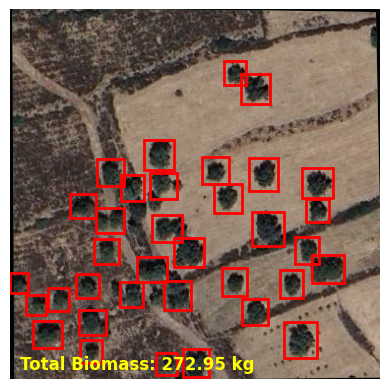

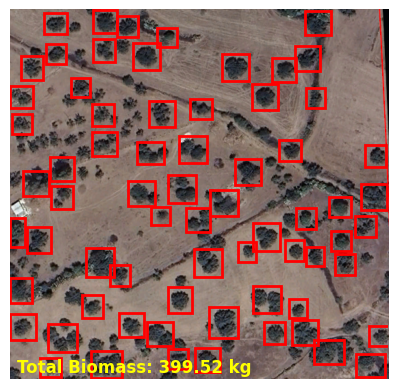

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepforest import main
import torch
from PIL import Image
import math

# Load the trained model
model_path = '/content/drive/MyDrive/InternshipProject/deepforest_model.pth'
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load(model_path))
model.model.eval()

# Directory containing test images
validation_images_dir = "/content/drive/MyDrive/InternshipProject/Test_Images"  # Update this path

# List all image files with .png, .jpg, or .jpeg extension
validation_image_paths = [
    os.path.join(validation_images_dir, img)
    for img in os.listdir(validation_images_dir)
    if img.lower().endswith((".png", ".jpg", ".jpeg"))
]

def plot_predictions(image_path, predictions):
    img = Image.open(image_path)
    width, height = img.size
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    factor_X = 193/width
    factor_Y = 193/height

    # Plot each prediction and calculate biomass
    total_biomass = 0
    for _, row in predictions.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        width, height = xmax - xmin, ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Calculate canopy area and biomass
        area = ((xmax - xmin) * factor_X) * ((ymax - ymin) * factor_Y)
        biomass = calculate_biomass(area)
        total_biomass += biomass

    # Add total biomass to the image
    ax.text(10, img.height - 10, f'Total Biomass: {total_biomass:.2f} kg', color='yellow', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()  # Display the image in the notebook

# Predict on images and visualize results
for image_path in validation_image_paths:
    predictions = model.predict_image(path=image_path)

    if not isinstance(predictions, pd.DataFrame):
        print(f"Error: Predictions for {image_path} are not in DataFrame format.")
        continue

    if predictions.empty:
        print(f"No predictions made for {image_path}.")
        continue

    # Plot predictions and show the image
    plot_predictions(image_path, predictions)
